In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = df.rename(columns={'mode':'modes'})

In [7]:
df_main = df.groupby('track_id',as_index=False).first()

In [8]:
df_main['binary_outcome'] = np.where( df_main.track_popularity > 45, 1, 0 )

In [9]:
df_main['binary_outcome'] = df_main['binary_outcome'].astype(str)

In [10]:
df_main = df_main.drop(columns='track_popularity')

In [11]:
df_clean = df_main.select_dtypes('number').copy()

In [12]:
df_clean['danceability'] = np.log(df_main.danceability + 0.00001)
df_clean['energy'] = np.log(df_main.energy + 0.00001)
df_clean['key'] = np.log(df_main.key + 0.00001)
df_clean['modes'] = np.log(df_main.modes + 0.001)
df_clean['speechiness'] = np.log(df_main.speechiness + 0.00001)
df_clean['acousticness'] = np.log(df_main.acousticness + 0.00001)
df_clean['instrumentalness'] = np.log(df_main.instrumentalness + 0.00001)
df_clean['liveness'] = np.log(df_main.liveness + 0.00001)
df_clean['valence'] = np.log(df_main.valence + 0.00001)
df_clean['tempo'] = np.log(df_main.tempo + 0.00001)
df_clean['duration_ms'] = np.log(df_main.duration_ms + 0.00001)

In [13]:
df_clean.head()

,danceability,energy,key,loudness,modes,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.382711,-0.913769,0.693152,-10.068,0.001000,-3.746085,-1.276508,-4.447312,-2.422383,-0.569144,4.575649,12.369211
1,-0.541268,-0.350963,1.609440,-6.242,0.001000,-3.360727,-2.731677,-11.512925,-1.551122,-0.359522,5.016372,12.192410
2,-1.193989,-0.127822,2.197226,-4.739,0.001000,-3.118804,-4.447312,-4.610183,-1.058402,-0.906316,4.906940,12.830705
3,-0.417017,-0.230659,2.302586,-5.644,-6.907755,-2.918586,-7.167822,-2.024878,-1.133173,-0.160157,4.852351,12.339576
4,-0.412475,-0.176725,0.000010,-6.300,0.001000,-2.997534,-2.171469,-7.254480,-2.429169,-0.701159,4.866642,12.372891


In [14]:
df_clean.shape

(28356, 12)

In [15]:
X_clean = StandardScaler().fit_transform(df_clean)

In [16]:
df_clean['popularity'] = df_main.binary_outcome.copy()

In [17]:
df_clean['popularity'] = df_clean['popularity'].astype(int)

In [19]:
df_clean.popularity.unique()

array([0, 1])

In [20]:
df_clean.dtypes

danceability        float64
energy              float64
key                 float64
loudness            float64
modes               float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
popularity            int64
dtype: object

In [21]:
df_clean['playlist_subgenre'] = df_main.playlist_subgenre.copy()

In [22]:
import statsmodels.formula.api as smf

In [25]:
formula_1 = 'popularity ~ danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms'

formula_2 = 'popularity ~ (danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms)**2'

formula_3 = 'popularity ~ playlist_subgenre'

formula_4 = 'popularity ~ danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms + playlist_subgenre'

formula_5 = 'popularity ~ (danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms) * (playlist_subgenre)'

formula_6 = 'popularity ~ np.power(danceability, 2) + np.power(energy, 2) + np.power(key, 2) + np.power(loudness, 2) + np.power(speechiness, 2) + np.power(acousticness, 2) + np.power(instrumentalness, 2) + np.power(liveness, 2) + np.power(valence, 2) + np.power(tempo, 2) + np.power(duration_ms, 2)'

formula_7 = 'popularity ~ np.power(danceability, 4) + np.power(energy, 4) + np.power(key, 4) + np.power(loudness, 4) + np.power(speechiness, 4) + np.power(acousticness, 4) + np.power(instrumentalness, 4) + np.power(liveness, 4) + np.power(valence, 4) + np.power(tempo, 4) + np.power(duration_ms, 4)'

formula_8 = 'popularity ~ np.power(danceability, 2) + np.power(energy, 2) + np.power(key, 2) + np.power(loudness, 2) + np.power(speechiness, 2) + np.power(acousticness, 2) + np.power(instrumentalness, 2) + np.power(liveness, 2) + np.power(valence, 2) + np.power(tempo, 2) + np.power(duration_ms, 2) + (danceability + energy + key + loudness + speechiness + acousticness + instrumentalness + liveness + valence + tempo + duration_ms) * (playlist_subgenre)'


In [26]:
def my_coefplot(model_object, figsize_use=(10,5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y = model_object.params.index,
                x = model_object.params,
                xerr = 2 * model_object.bse,
                fmt='o', color='black', ecolor='black',
                elinewidth=3, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

In [27]:
fit_01 = smf.logit(formula = formula_1, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 5


In [28]:
print( fit_01.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28344
Method:                           MLE   Df Model:                           11
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.03180
Time:                        15:04:02   Log-Likelihood:                -18892.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                2.293e-259
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.1785      0.642      8.071      0.000       3.921       6.436
danceability         0.0008      0.052      0.016      0.987      -0.102       0.104
energy              -0.8199 

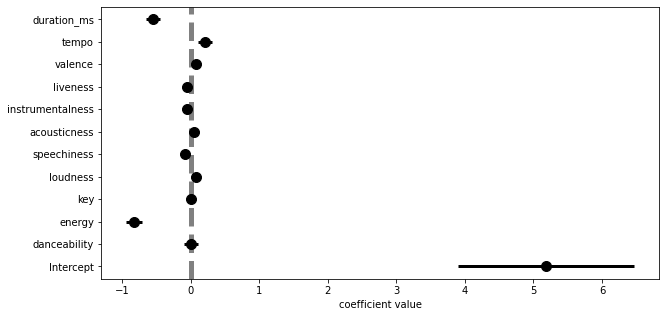

In [29]:
my_coefplot(fit_01)

In [30]:
fit_02 = smf.logit(formula = formula_2, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.658033
         Iterations 10


In [31]:
print( fit_02.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28289
Method:                           MLE   Df Model:                           66
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.04373
Time:                        15:04:03   Log-Likelihood:                -18659.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.8655     12.570     -0.228      0.820     -27.502      21.771
danceability                     13.0461      2.339      5.577      0.000 

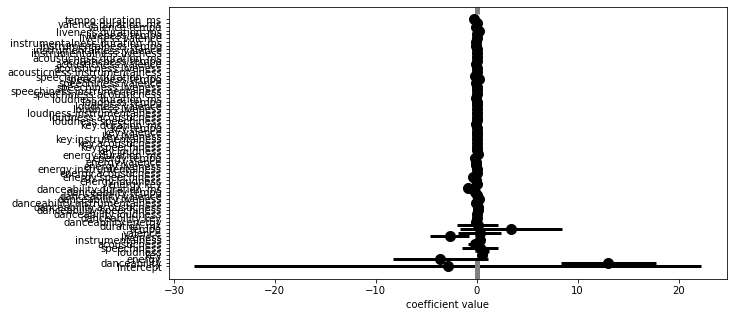

In [32]:
my_coefplot(fit_02)

In [33]:
fit_03 = smf.logit(formula = formula_3, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.630960
         Iterations 5


In [34]:
print( fit_03.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28332
Method:                           MLE   Df Model:                           23
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.08307
Time:                        15:04:04   Log-Likelihood:                -17892.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.2967      0.063     -4.729      0.000      -0.420      -0.174
playlist_subgenre[T.big

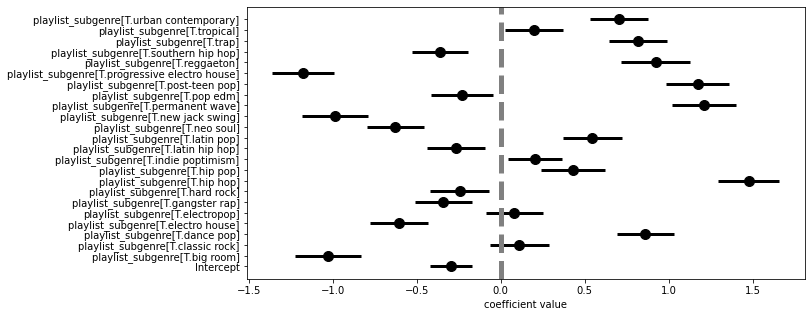

In [35]:
my_coefplot(fit_03)

In [36]:
fit_04 = smf.logit(formula = formula_4, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.621108
         Iterations 5


In [37]:
print( fit_04.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28321
Method:                           MLE   Df Model:                           34
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.09739
Time:                        15:04:04   Log-Likelihood:                -17612.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          1.4692      0.730      2.013      0.044       0.039       2.900
playlist_subgenre[T.big

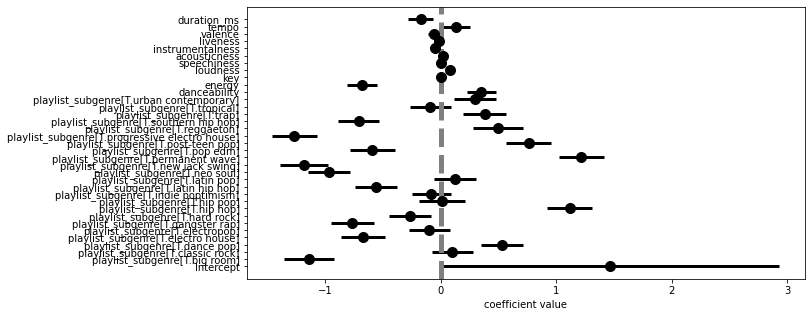

In [38]:
my_coefplot(fit_04)

In [39]:
fit_05 = smf.logit(formula = formula_5, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.604122
         Iterations 7


In [40]:
print( fit_05.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28068
Method:                           MLE   Df Model:                          287
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                  0.1221
Time:                        15:04:05   Log-Likelihood:                -17130.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          -4.9575      2.911     -1.703      0.

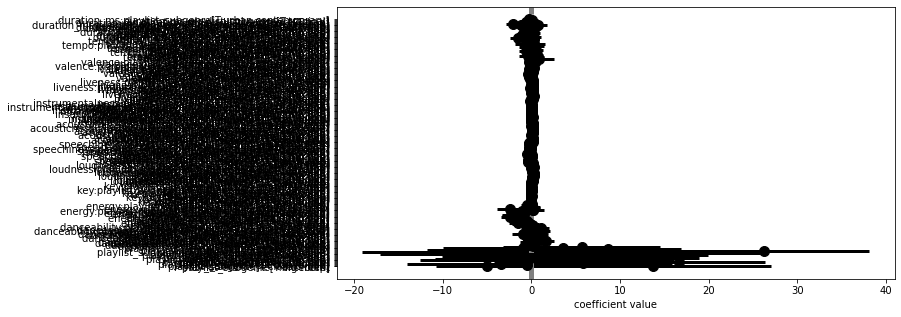

In [41]:
my_coefplot(fit_05)

In [42]:
fit_06 = smf.logit(formula = formula_6, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.670203
         Iterations 5


In [43]:
print( fit_06.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28344
Method:                           MLE   Df Model:                           11
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.02604
Time:                        15:04:09   Log-Likelihood:                -19004.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                6.055e-211
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         2.6832      0.326      8.232      0.000       2.044       3.322
np.power(danceability, 2)        -0.0409      0.017     -2.385      0.017 

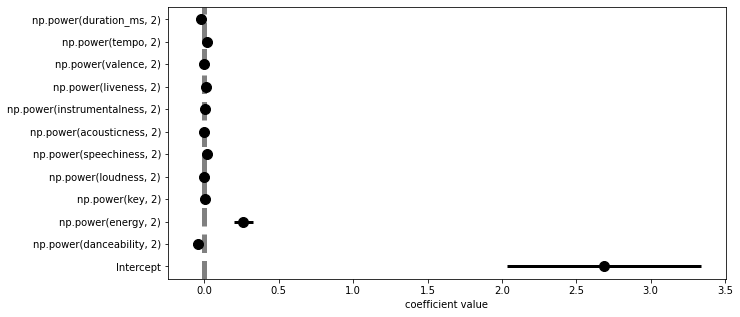

In [44]:
my_coefplot(fit_06)

In [45]:
fit_07 = smf.logit(formula = formula_7, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.673616
         Iterations 8


In [46]:
print( fit_07.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28344
Method:                           MLE   Df Model:                           11
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.02108
Time:                        15:04:09   Log-Likelihood:                -19101.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                2.464e-169
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.3546      0.162      8.339      0.000       1.036       1.673
np.power(danceability, 4)        -0.0025      0.001     -2.822      0.005 

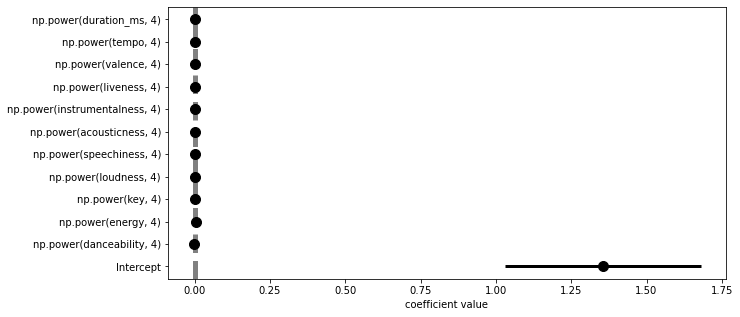

In [47]:
my_coefplot(fit_07)

In [48]:
fit_08 = smf.logit(formula = formula_8, data = df_clean).fit()

Optimization terminated successfully.
         Current function value: 0.603173
         Iterations 8


In [49]:
print( fit_08.summary() )

                           Logit Regression Results                           
Dep. Variable:             popularity   No. Observations:                28356
Model:                          Logit   Df Residuals:                    28057
Method:                           MLE   Df Model:                          298
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                  0.1235
Time:                        15:04:11   Log-Likelihood:                -17104.
converged:                       True   LL-Null:                       -19512.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -85.8612     19.056     -4.506      0.

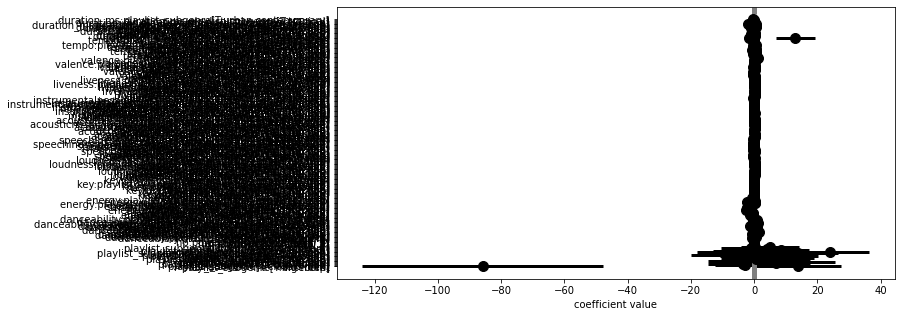

In [50]:
my_coefplot(fit_08)

In [51]:
mod_list = [fit_01, fit_02,fit_03, fit_04, fit_05, fit_06, fit_07, fit_08]

In [52]:
df_copy = df_clean.copy()

In [53]:
for i, mod in enumerate(mod_list):
    df_copy['pred_probability_'+str(i+1).zfill(2)] = mod.predict(df_clean)

In [54]:
for i in range(len(mod_list)):
    df_copy['pred_class_'+str(i+1).zfill(2)] = np.where( df_copy['pred_probability_'+str(i+1).zfill(2)] > 0.5, 1, 0)

In [55]:
model_accuracy = []

for i in range(len(mod_list)):
    model_accuracy.append( df_copy.loc[ df_copy.popularity == df_copy['pred_class_'+str(i+1).zfill(2)] ].shape[0] / df_copy.shape[0])

In [56]:
model_accuracy

[0.591761884609959,
 0.6004372972210467,
 0.6495627027789533,
 0.6560516292848074,
 0.6735435181266751,
 0.5862251375370292,
 0.5765270136831712,
 0.6743193680349838]

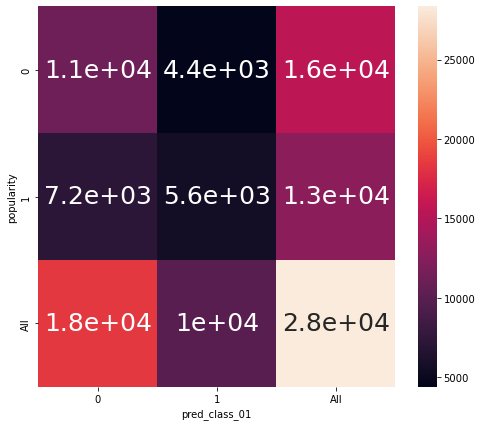

In [60]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_01, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

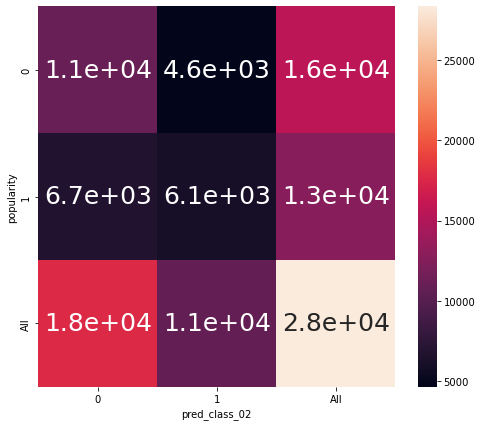

In [61]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_02, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

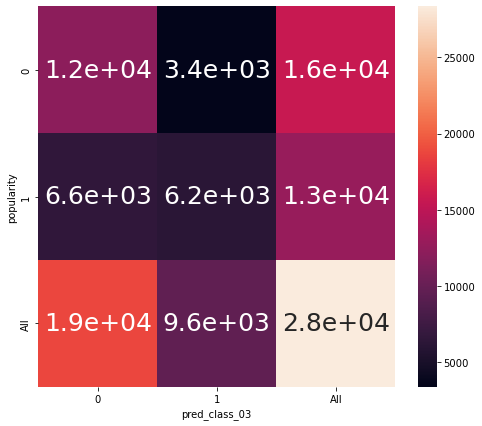

In [62]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_03, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

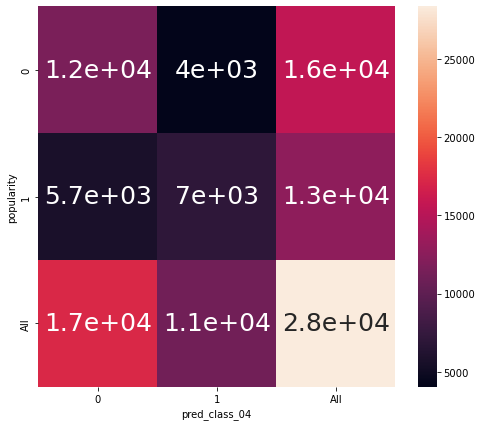

In [63]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_04, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

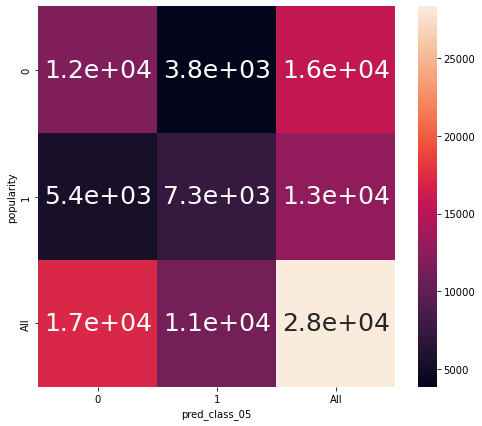

In [64]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_05, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

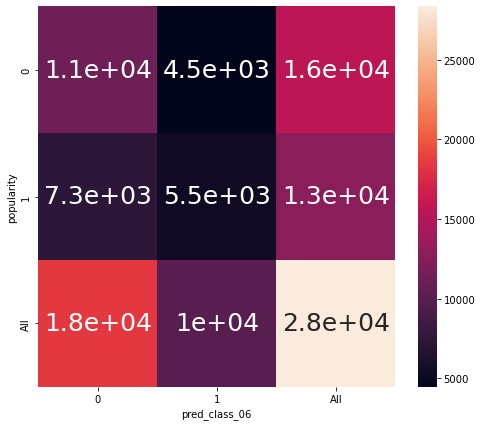

In [65]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_06, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

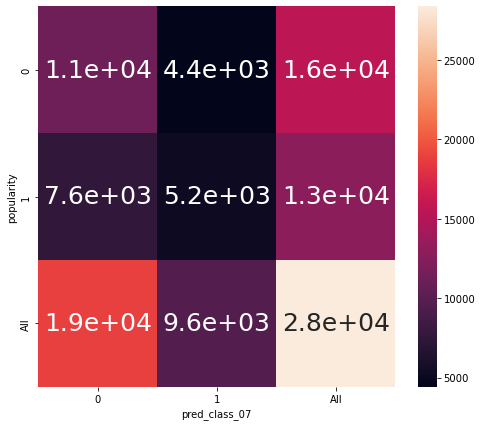

In [66]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_07, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

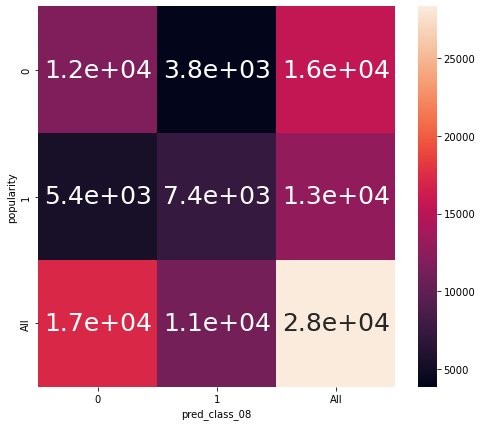

In [67]:
fig, ax = plt.subplots(figsize=(8,7))

sns.heatmap(pd.crosstab(df_copy.popularity, df_copy.pred_class_08, margins=True),
            annot=True, annot_kws={'size': 25},
            ax=ax)

plt.show()

In [68]:
from sklearn.metrics import roc_curve

In [72]:
def roc_values(mod_id, df_object):
    fpr, tpr, threshold = roc_curve(df_object.popularity.to_numpy(), df_object['pred_probability_'+str(mod_id+1).zfill(2)].to_numpy())
    res = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': threshold})
    res['model_name'] = 'fit_'+str(mod_id+1).zfill(2)
    
    return res

In [73]:
all_roc_curves = []

for i in range(len(mod_list)):
    all_roc_curves.append( roc_values(i, df_copy) )

In [74]:
all_roc_df = pd.concat(all_roc_curves).reset_index()

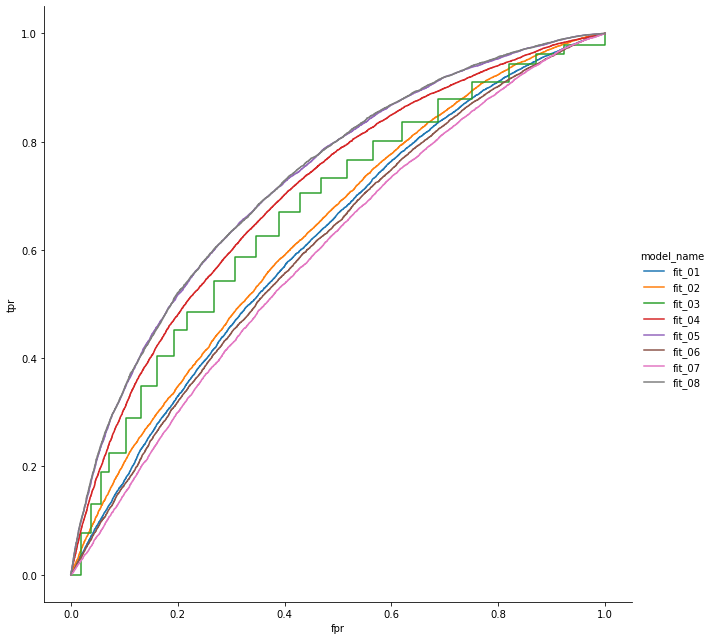

In [75]:
sns.relplot(data = all_roc_df, x='fpr', y='tpr', hue='model_name',
            estimator=None, units='model_name',
            kind='line',
            drawstyle='steps-post',
            height=9)

plt.show()

In [76]:
num_inputs = df_clean.select_dtypes('number').copy().columns.to_list()

In [78]:
lf_num = df_clean.melt(id_vars=['popularity','playlist_subgenre'], value_vars = num_inputs, ignore_index=True)

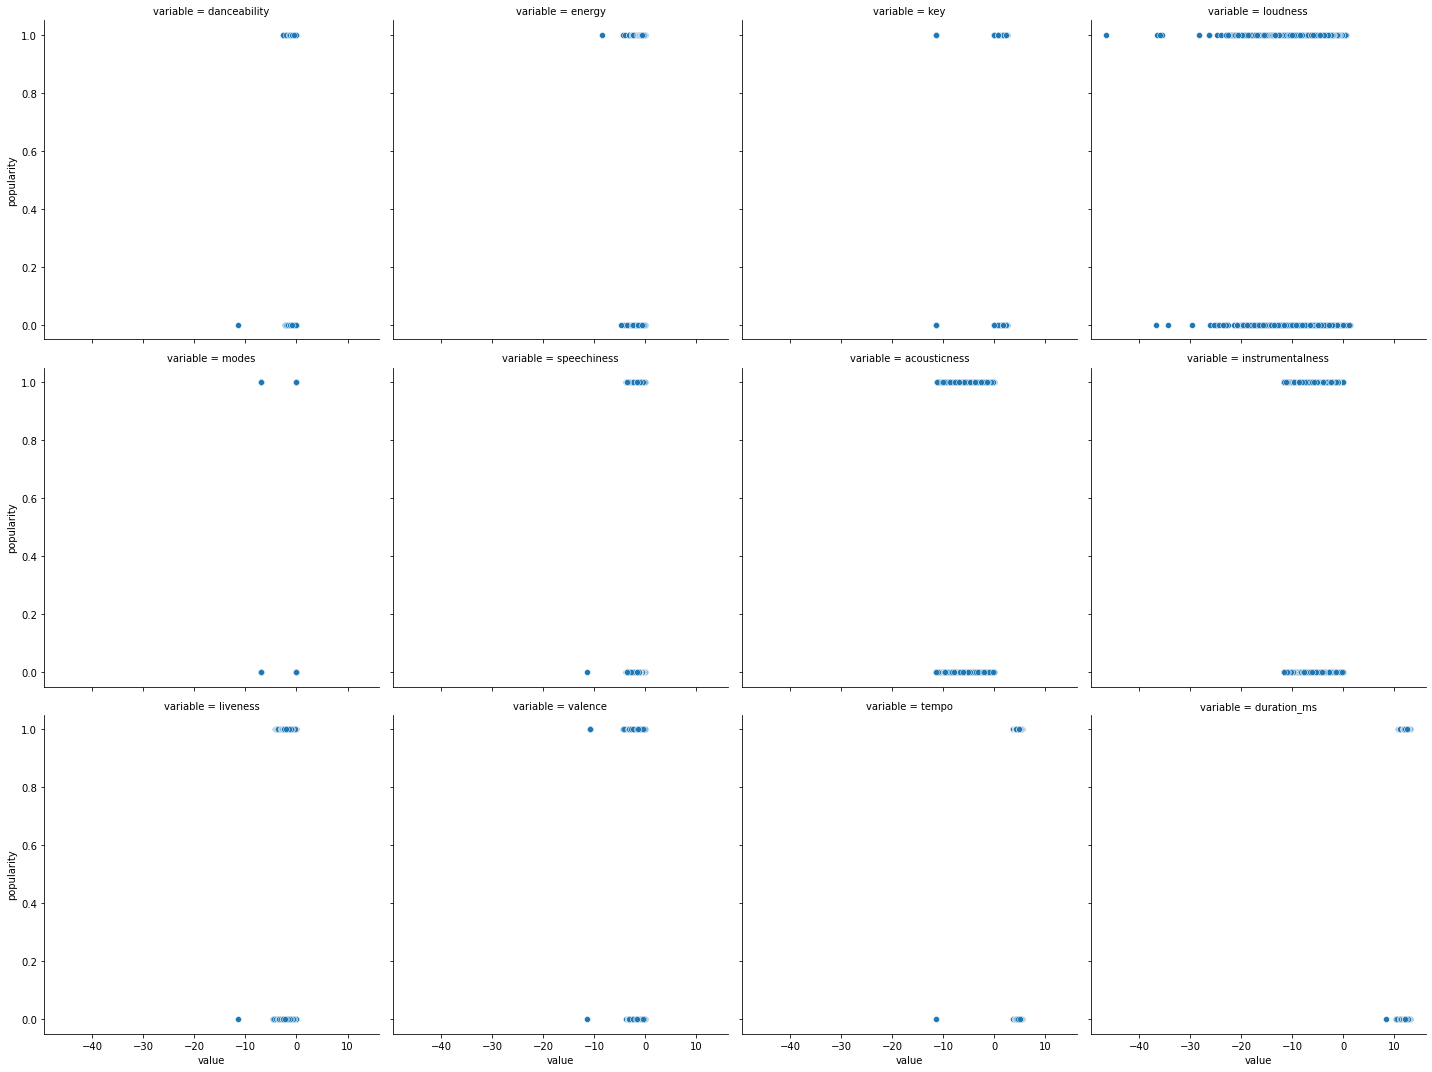

In [79]:
sns.relplot(data = lf_num, x='value', y='popularity', col='variable', col_wrap=4)

plt.show()

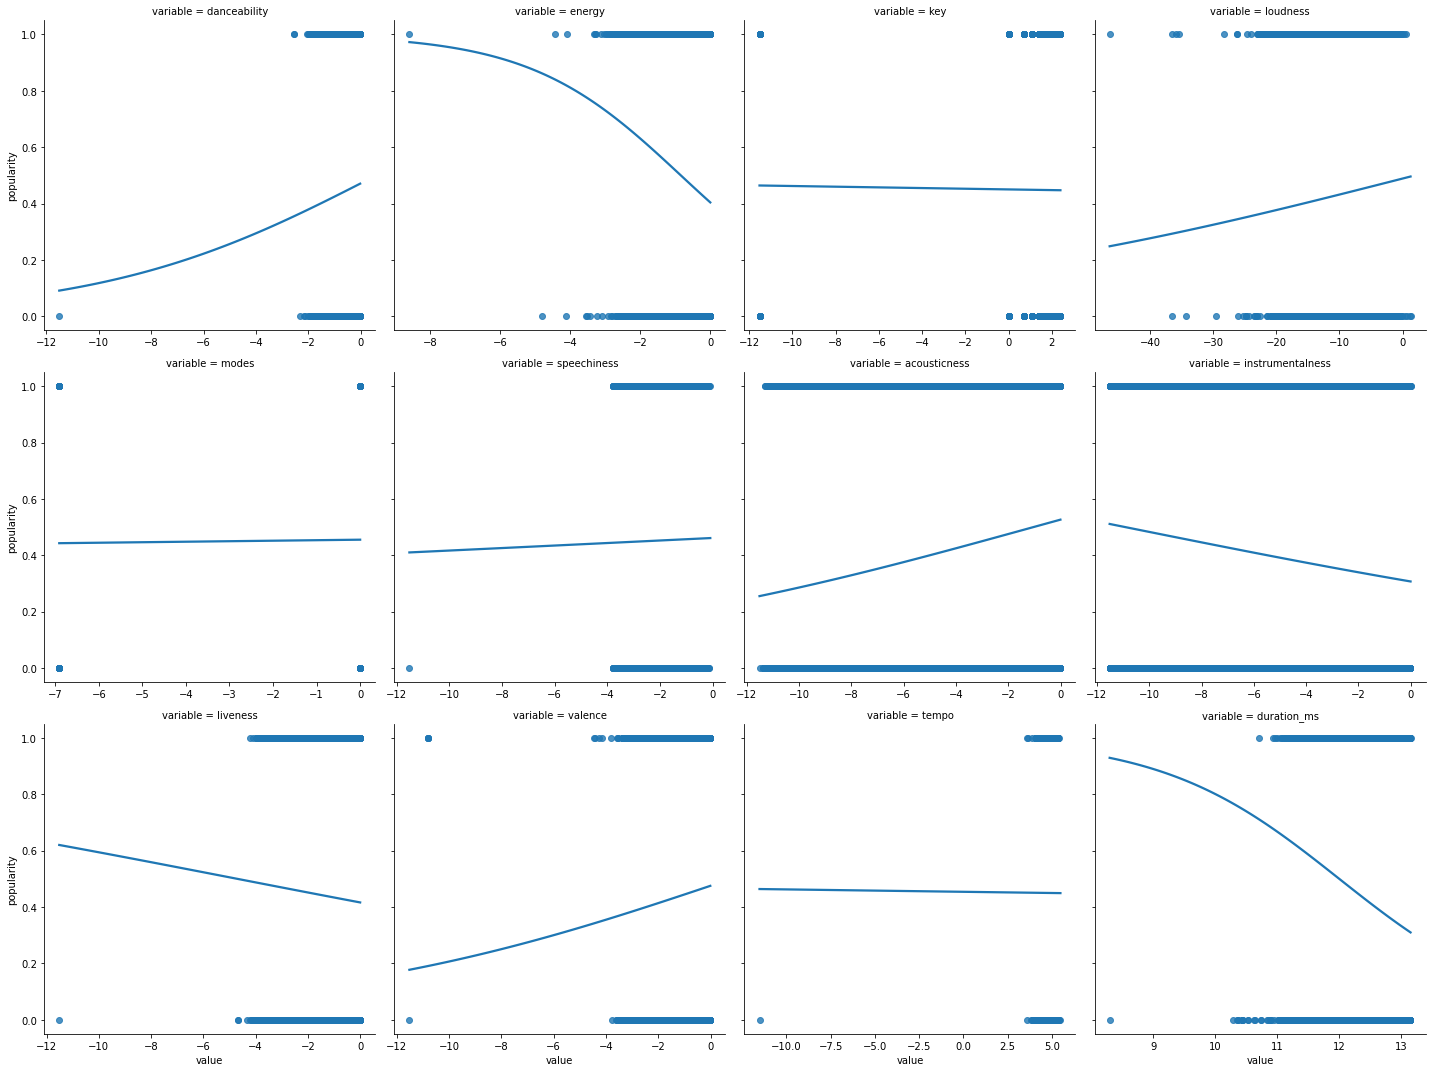

In [80]:
sns.lmplot(data = lf_num, x='value', y='popularity', col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()

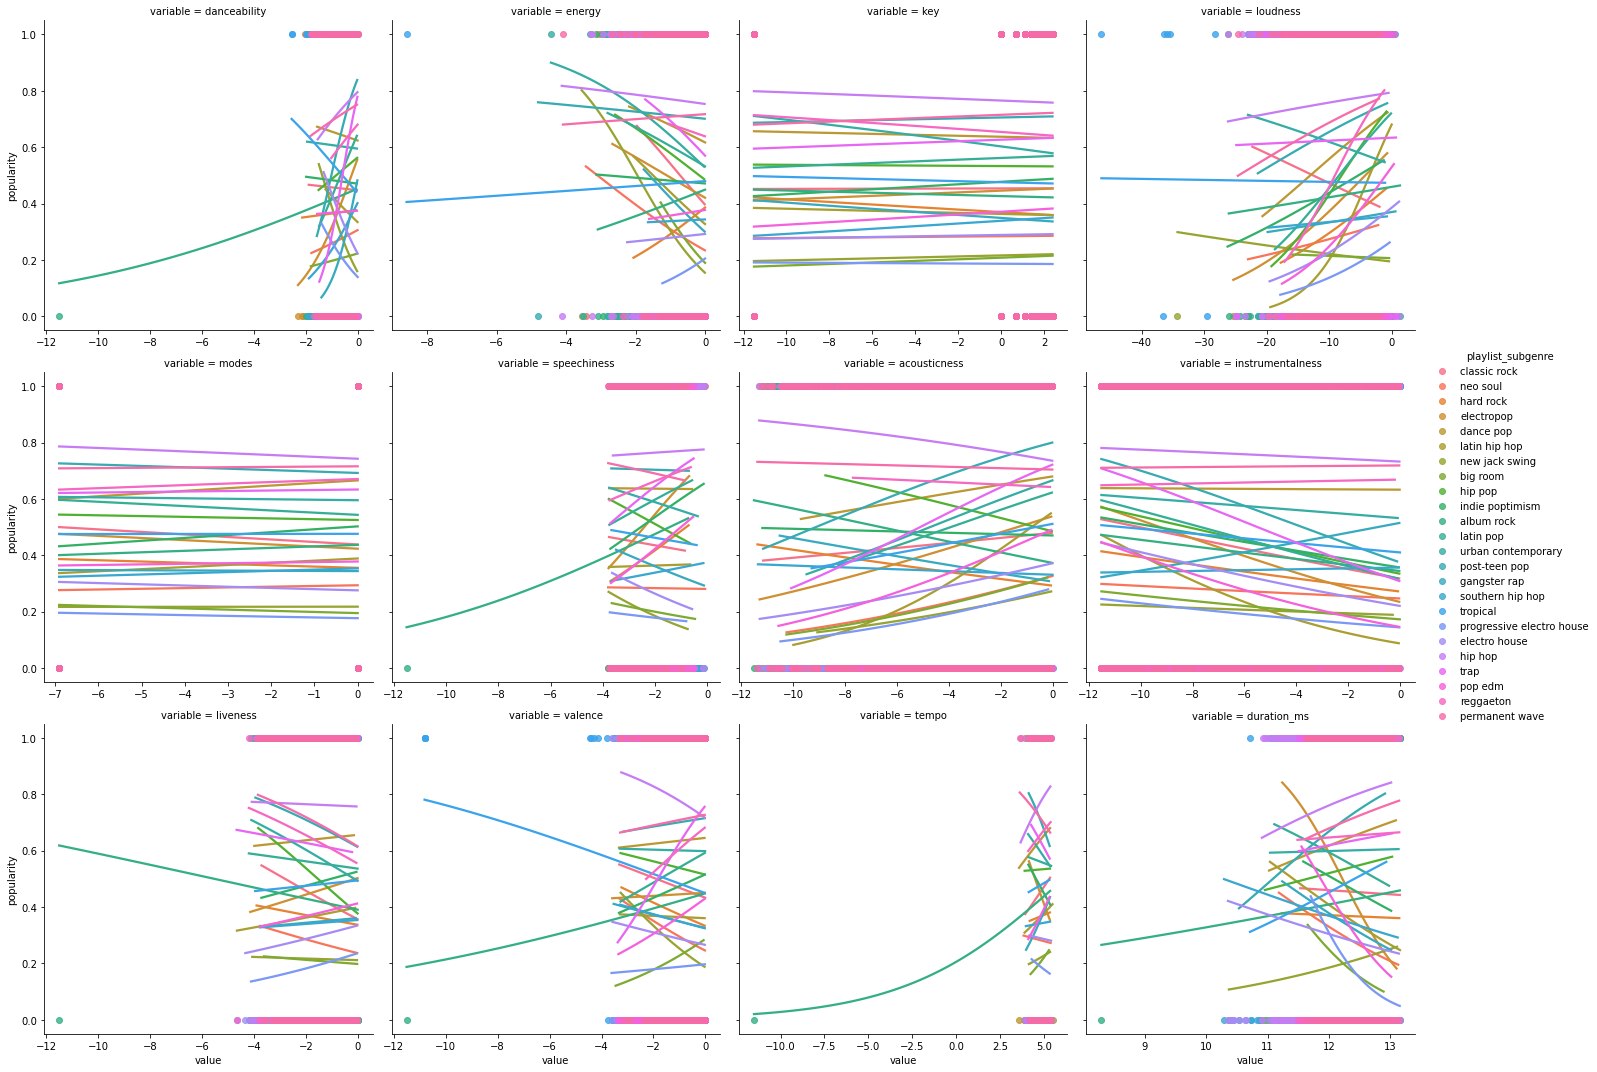

In [81]:
sns.lmplot(data = lf_num, x='value', y='popularity', hue='playlist_subgenre',col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()